# Interactive learning "Active learning" 


This is a playground for an active learning setting for the course [interactive learning](https://www.mah.se/upload/FAKULTETER/TS/Forskning/Kursplan%20Interaktiv%20maskininl%C3%A4rning.pdf)

Seminar 2 on active learning with example sorting batteries in 2 classes "alkaline" and "chargeable"

In [8]:
# Som get started crap run this first
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
import sys
import platform
sys.path.append("../../") # go to parent dir
from fastai.imports import *
print(platform.python_version())
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
# set some variables
PATH = "/storage/myData/batteries/"
arch=resnet34  ##Using the resnet34 model
sz=224
print(f'NVidia GPUs is called CUDA aviable {torch.cuda.is_available()}')
print(f'deep learning accelerator aviable CuDNN {torch.backends.cudnn.enabled}')
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.load("batteries_1")
actimage = 0
test_path = PATH+'test/'
test_batch = np.array(os.listdir(test_path))
def predict_batteries(show_image=False):
    global actimage
    imgName ="end"
    if actimage<test_batch.size:
        trn_tfms, val_tfms = tfms_from_model(arch,sz)
        img = open_image(test_path+test_batch[actimage])
        im = val_tfms(img)
        log_preds = learn.predict_array(im[None])
        probs = np.exp(log_preds)
        img = []
        titles = []
        imgName = test_batch[actimage]
        title=data.classes[np.argmax(probs)]+":"+str(np.around(probs[:,np.argmax(probs)],decimals=2))+":"+test_batch[actimage]
        titles.append(data.classes[np.argmax(probs)]+":"+str(np.around(probs[:,np.argmax(probs)],decimals=2))+":"+test_batch[actimage])    
        if show_image:
            img.append(plt.imread(test_path+test_batch[actimage]))
            actimage = actimage+1
            return plots(img,titles=titles,rows=1,figsize=(20,16))
        else:
            actimage = actimage+1
            return data.classes[np.argmax(probs)],np.around(probs[:,np.argmax(probs)],decimals=2),imgName
    else:
        actimage=0
        return 0,0,0


3.6.6
NVidia GPUs is called CUDA aviable True
deep learning accelerator aviable CuDNN True


## Predictions on test set


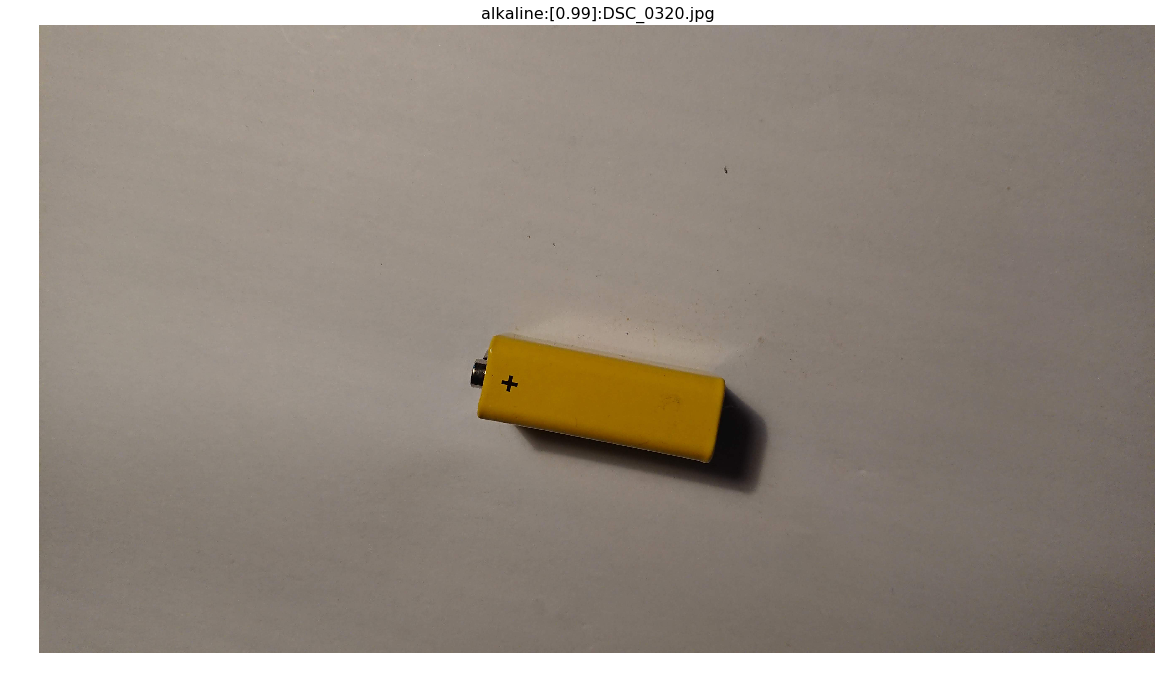

In [4]:
predict_batteries(show_image=True)


## Selecting which batteries to label

In [5]:
#Stragegies
def random_strategy_label_this(percentage_selected=10):
    if random.randrange(0,100)<percentage_selected:
        return True
    else:
        return False

#Stragegies
def fixed_uncertainty_strategy_label_this(uncertainty,uncertainty_level=90):
    if uncertainty*100<uncertainty_level:
        return True
    else:
        return False

In [6]:
budget = 10
labelling_cost = 2
accumulated_cost = 0
predictedclass,accuracy,image = predict_batteries(show_image=False)    
while predictedclass is not 0:
    print("Predicted class:" + predictedclass +" with accuracy "+ str(accuracy[0]))
    if accumulated_cost < budget and random_strategy_label_this(percentage_selected=10):
        print("Label: "+image)
        accumulated_cost = accumulated_cost + labelling_cost
    predictedclass, accuracy, name = predict_batteries(show_image=False)

#Metric
print("Metric: "+str(budget-accumulated_cost))

Predicted class:chargeable with accuracy 0.87
Predicted class:chargeable with accuracy 1.0
Predicted class:chargeable with accuracy 0.83
Predicted class:alkaline with accuracy 0.95
Predicted class:chargeable with accuracy 0.94
Label: DSC_0281.jpg
Predicted class:alkaline with accuracy 0.94
Label: DSC_0281.jpg
Predicted class:alkaline with accuracy 0.93
Predicted class:chargeable with accuracy 1.0
Predicted class:chargeable with accuracy 0.99
Predicted class:alkaline with accuracy 0.98
Predicted class:alkaline with accuracy 0.98
Predicted class:chargeable with accuracy 0.74
Metric: 6


In [9]:
budget = 10
labelling_cost = 2
accumulated_cost = 0
predictedclass,accuracy,image = predict_batteries(show_image=False)    
while predictedclass is not 0:
    print("Predicted class:" + predictedclass +" with accuracy "+ str(accuracy[0]))
    if accumulated_cost < budget and fixed_uncertainty_strategy_label_this(accuracy):
        print("Label: "+image)
        accumulated_cost = accumulated_cost + labelling_cost
    predictedclass, accuracy, name = predict_batteries(show_image=False)

#Metric
print("Metric: "+str(budget-accumulated_cost))

Predicted class:alkaline with accuracy 1.0
Predicted class:chargeable with accuracy 0.78
Label: DSC_0320.jpg
Predicted class:chargeable with accuracy 1.0
Predicted class:chargeable with accuracy 0.68
Label: DSC_0320.jpg
Predicted class:alkaline with accuracy 0.96
Predicted class:chargeable with accuracy 0.75
Label: DSC_0320.jpg
Predicted class:alkaline with accuracy 0.95
Predicted class:alkaline with accuracy 0.98
Predicted class:chargeable with accuracy 0.97
Predicted class:chargeable with accuracy 0.99
Predicted class:alkaline with accuracy 0.97
Predicted class:alkaline with accuracy 0.8
Label: DSC_0320.jpg
Predicted class:alkaline with accuracy 0.87
Label: DSC_0320.jpg
Metric: 0
